# Installing OpenCV

The following is setup to get a running opencv-3 environment.  We will be using conda-forge because the opencv in stock conda is older.

We will follow a process similar to:

  * [Kernels for different environments](https://ipython.readthedocs.io/en/latest/install/kernel_install.html#kernels-for-different-environments) and
  * [Installing Different Kernels](https://ipython.readthedocs.io/en/latest/install/kernel_install.html#kernels-for-python-2-and-3)

except we will also be pulling in dependencies from a non-stock conda repository called `conda-forge`.  `conda-forge` is a community-driven resource for package recipes.

On Mac/Linux enter the following in a terminal window:
```
    conda update conda
    conda create --name opencv-forge --clone root
    source activate opencv-forge
    conda install -c conda-forge opencv
    conda install ipykernel
    python -m ipykernel install --user --name opencv-forge --display-name "Py3 OpenCV3 (Forge)"
```

[FIXME VERIFY] 
On Windows, open an Anaconda Command Prompt"Start Menu -> Anaconda 64-bit -> Anaconda Prompt" and enter:

```
    conda update conda
    conda create --name opencv-forge --clone root
    source activate opencv-forge
    conda install -c conda-forge opencv
    conda install ipykernel
    python -m ipykernel install --user --name opencv-forge --display-name "Py3 OpenCV3 (Forge)"
```

If you haven't worked with alternative conda environments and jupyter/ipython kernels before, you'll want to check out this:
  * [Getting started with Conda](https://conda.io/docs/user-guide/getting-started.html)
  
Now, when you create a new Jupyter notebook, you can choose **Py3 OpenCV3 (Forge)** from a drop-down.  

<img src="../common/images/jupyter-kernel-select.png">

You will also see **Py3 OpenCV3 (Forge)** in Jupyter under **File --> New Notebook** and **Kernel --> Change kernel**.  Selecting these really does something bigger than "just" changing the kernel:  it also enables *all* the packages in that environment.  So, in effect, it is really more similar to changing the entire environement.  One way of viewing a kernel is as an entry point to an environment.

# Foundational Friends

## NumPy

[NumPy](http://www.numpy.org/) is the foundation of (almost?) all numerical computing - number crunching - in Python.  Everything from numerical methods to statistical analysis to linear algebra to, yes, computer vision is built on NumPy.  We won't be doing a full course worth of material on NumPy, but if you want to dive deeper, check out:
  * [NumPy User Guide](https://docs.scipy.org/doc/numpy-1.13.0/user/index.html)
  * [Scipy Lectures NumPy](http://www.scipy-lectures.org/intro/numpy/index.html)

In [3]:
!conda update conda
!conda create --name opencv-forge --clone root
!source activate opencv-forge
!conda install -c conda-forge opencv
!conda install ipykernel
!python -m ipykernel install --user --name opencv-forge --display-name "Py3 OpenCV3 (Forge)"

Solving environment: done

# All requested packages already installed.

Source:      /anaconda2
Destination: /anaconda2/envs/opencv-forge
The following packages cannot be cloned out of the root environment:
 - conda-4.5.11-py27_0
 - conda-build-3.10.5-py27_0
 - conda-env-2.6.0-h36134e3_0
Packages: 253
Files: 12756

bzip2-1.0.6          | ################################################# | 100% 
ca-certificates-2018 | ################################################# | 100% 
intel-openmp-2018.0. | ################################################# | 100% 
jbig-2.1             | ################################################# | 100% 
jpeg-9b              | ################################################# | 100% 
libcxxabi-4.0.1      | ################################################# | 100% 
libgfortran-3.0.1    | ################################################# | 100% 
libiconv-1.15        | ################################################# | 100% 
libsodium-1.0.16     | ############

numexpr-2.6.5        | ################################################# | 100% 
pandas-0.23.0        | ################################################# | 100% 
pickleshare-0.7.4    | ################################################# | 100% 
pyflakes-1.6.0       | ################################################# | 100% 
pygments-2.2.0       | ################################################# | 100% 
pytest-3.5.1         | ################################################# | 100% 
pywavelets-0.5.2     | ################################################# | 100% 
scipy-1.1.0          | ################################################# | 100% 
testpath-0.3.1       | ################################################# | 100% 
tornado-5.0.2        | ################################################# | 100% 
wheel-0.31.1         | ################################################# | 100% 
astroid-1.6.3        | ################################################# | 100% 
astropy-2.0.6        | #####

In [4]:
import numpy as np # common abbreviation

Arrays are low-level data structures (very similar to a C array).  They have a fixed block of memory and a fixed datatype for the elements.  We also keep track of the array's shape, but shapes can be malleable.  Why?  The big block of memory is really just a 1-D thing (think of a ticker tape).  Any structure we put on it (say, 4 rows and 6 columns) will have some other ways of regularly chunking it (24 elements, 6x4, 8x3, 3x8, etc.).

In [5]:
arr_int = np.array([1,2,3]) # create array from a list

# feel free to uncomment:
#for attr in ["", "size", "shape", "dtype"]:
#    print("array {:5s} {}".format(attr, getattr(arr_int, attr, arr_int)))
print(arr_int)
print(arr_int.size, arr_int.shape, arr_int.dtype)

[1 2 3]
(3, (3,), dtype('int64'))


In [6]:
def show_array(arr):
    print(arr)
    for attr in ["size", "shape", "dtype"]:
        print("{:>5s} {}".format(attr, getattr(arr, attr)))  # getattr(obj, "attr") --> obj.attr

# create array from range of values ... and shape it with 3 rows, 4 cols
arr_range = np.arange(12.0).reshape(3,4)
show_array(arr_range)

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
 size 12
shape (3, 4)
dtype float64


In [7]:
# some other forms along with our most useful dtypes for computer vision:
np.array([2,2], dtype=np.uint8)
np.array([2,2], dtype=np.float64)
np.array([2,2], dtype=np.int64)

np.array([2,2]).astype(np.float64) # note:  temp array (int64) created
np.array([2,2]).astype(np.uint8)   # note:  temp array and might lose info (64 bit -> 8 bit)

np.uint8((2,2))
np.float64([[2,2]])
np.int64([2,2,2])

array([2, 2, 2])

In [8]:
npr = np.random # not public radio
arr_rnd = npr.randint(0, 256, size=(5,5))
show_array(arr_rnd)

[[118 154 167 169 233]
 [ 93  15   4 145 150]
 [ 28  30 193 114 203]
 [143  28 172 131 102]
 [160  99 226 130 122]]
 size 25
shape (5, 5)
dtype int64


In [9]:
# changing shapes *does not* copy the array
alias = arr_rnd.reshape(25)
alias[0] = -99
print(alias[0], arr_rnd[0])

(-99, array([-99, 154, 167, 169, 233]))


In [10]:
# changing dtype DOES (must) copy the array
arr_rnd_float = arr_rnd.astype(np.float64) # aka np.float np.float_
arr_rnd_float[0,0] = -0.99                 # it's a 2D thing
print(arr_rnd[0], arr_rnd_float[0])

(array([-99, 154, 167, 169, 233]), array([ -0.99, 154.  , 167.  , 169.  , 233.  ]))


In [14]:
# we can select out rows and columns
arr_rnd[:2, 1]  # first two rows, column 1

# we can apply operations to blocks of elements in one-shot
arr_rnd[:2, :2] * 2

# we can assign to block of elements
arr_rnd[:2, :2] = 1
arr_rnd

array([[  1,   1, 167, 169, 233],
       [  1,   1,   4, 145, 150],
       [ 28,  30, 193, 114, 203],
       [143,  28, 172, 131, 102],
       [160,  99, 226, 130, 122]])

One of the more important, and sometimes confusing, aspects of NumPy is the idea of *axes*.  The reason it is confusing is because a common phrase `axis=0` looks like it means different things at different times.  However, the fundamental definition is always the same.  Summing over `axis=0` means summing over the *outer-most* dimension of the array.  Phrased another way, it means we sum over the first of whatever dimensions (1, 5, 100) our array has.

In [17]:
arr = np.arange(10).reshape(5,2)
column_sums = arr.sum(axis=0)
print(arr, arr.shape, column_sums, sep='\n')

SyntaxError: invalid syntax (<ipython-input-17-e8d9a2075778>, line 3)

In this case, summing over the outer-most dimension means we loop over the outer-most dimension.  This means we add up over the "visual rows" (but be careful of relying on the visual cue!).  So, we end up with a result that "looks like" (careful!) a row:  it has two elements ... *which are the column sums*.  See the weirdness?  If we have *c* columns, to get our *c* column-sums, we *loop over the rows*.  You can think of this as accumulating a new "row".

In [16]:
row_sums = arr.sum(axis=1)
print(arr, arr.shape, arr.sum(axis=1), sep='\n')

SyntaxError: invalid syntax (<ipython-input-16-8cfe0367db7b>, line 2)

Here, we loop over the `axis=1` leads to `arr.shape[1]` gives 2 columns and add them up to produce a new "pseudo-column".  This pseudo-column holds *the row sums*.  Two other tid-bits:  
  1.  The output looks like a "row".  Don't be fooled.  It is really a 1-D thing.  This is because we have "summed out" and hence, reduced, one dimension of the array.
  2.  If you want a 2-D result, you can use an argument `keepdims=True`.  This keeps the dimension that we summed over (with a shape of 1).  This can simplify mathematics that combine the original array with the aggregated result.

In [18]:
print(arr, arr.shape, arr.sum(axis=1, keepdims=True), sep='\n')

SyntaxError: invalid syntax (<ipython-input-18-23f6c95612a9>, line 1)

We can build new arrays by "pasting together" sources arrays in a few ways.  The most general is `np.concatenate`:

In [19]:
# think sum by looping over the rows to get new pseudo-row
# think concatentate (join-together) these arrays by adding them row-wise
# but really:  looping over the outermost dimension to get a new pseudo-outermost dimension
#              think concatentate (join-together) these arrays by taking on to the outermost dimension
column_sums = arr.sum(axis=0, keepdims=True)
np.concatenate([arr, column_sums], axis=0)

NameError: name 'arr' is not defined

In [20]:
# looping over the second outermost dimension to get a new pseudo-secondmost dimension
# think concatentate (join-together) these arrays by taking on to the second-outermost dimension
column_sums = arr.sum(axis=1, keepdims=True)
np.concatenate([arr, column_sums], axis=1)

NameError: name 'arr' is not defined

You'll may also see these:  
 * np.hstack, np.vstack, np.dstack (deprecated or at least discouraged)
 * np.stack (preferred to `np.[hvd]stack` above)
 * np.column_stack, np.row_stack (sometimes useful b/c they promote to 2-D)
 
You can do everything they do with `np.concatenate`.  From a learning-efficiency perspective, get good with `np.concatenate` and let that be that.

In [21]:
# adding axes
arr = np.array([1,2,3])

arr.reshape(1,3) # "row vector"
arr.reshape(3,1) # "col vector"

arr[np.newaxis, :] # "row vector"
arr[:, np.newaxis] # "col vector


array([[1],
       [2],
       [3]])

# Matplotlib

[Matplotlib](https://matplotlib.org/) is the foundation of the standard plotting and graphics display in the Python universe.  Seaborn and Pandas both use it under-the-hood.  Jupyter Notebooks have tight integration with it.  Generally, we'll only be using its most basic features.  So, if you need to know more, you'll want to check out:
  * [Matplotlib User's Guide](https://matplotlib.org/users/index.html)
  * [Scipy Lecture Notes](http://www.scipy-lectures.org/intro/matplotlib/index.html)

In [22]:
# FIMME OUTLINE (remove when done)
# OO versus matlab APIs
# simple plots (plot x-y, scatter, histogram, imshow)
# simple styling (removing spines, hiding axes, titles, labels, limits)
# imshow ---> cmap

To get going with matplotlib, we will "always" issue the following commands:

In [23]:
# common abbreviation
import matplotlib.pyplot as plt  

# jupyter notebook specific to have plots appear in the notebook
%matplotlib inline               

Here is a simple example of a basic matplotlib graph.  One small note:  the ";" (semi-colon) at the end of the last line is there to prevent Jupyter from printing out the evaluated value of the last line of the cell.  Feel free to remove it and see the difference (re-run the cell with it removed).  We simply add the semi-colon as a cosmetic touch.

Text(0.5,0,'Time')

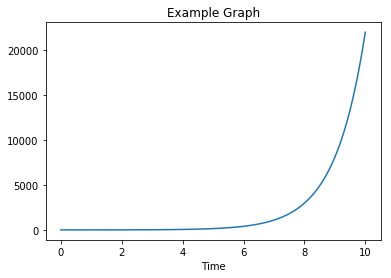

In [24]:
xs = np.linspace(0,10, 100) # 100 evenly spaced points from 0 to 10 inclusive
ys = np.exp(xs)  # y = e^x

# fig = plt.gcf() # explicitly get the default (current) figure (holder for "full" graphic) (rarely needed)
ax = plt.gca()    # explicitly get the default (current) drawing axis

ax.plot(xs, ys) # basic graph from two sequences:  x-points and y-points        
ax.set_title("Example Graph")
ax.set_xlabel("Time")
# ax.axis('off');  # uncomment me to see the difference with/without spines and labels

Counter({8: 5, 1: 4, 7: 3, 0: 2, 3: 2, 4: 1, 5: 1, 6: 1, 9: 1})


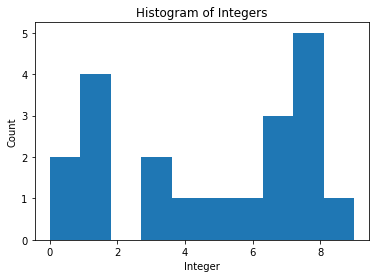

In [25]:
ax = plt.gca()
arr = npr.randint(0,10,20)
ax.hist(arr, bins=10)

ax.set_xlabel("Integer")
ax.set_ylabel("Count")
ax.set_title("Histogram of Integers")

import collections as co
print(co.Counter(arr)) # pure python counts of occurances

The most heavily used matplotlib command in this course is `imshow`.  We'll talk about more of the `imshow` details next week, but for now let's try it out:

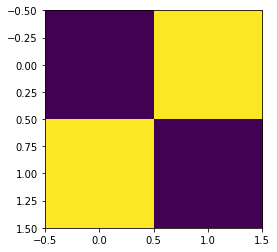

In [26]:
# our idea here is grayscale image, black and white
arr = np.array([[0,1],
                [1,0]], dtype=np.float64)
plt.gca().imshow(arr)

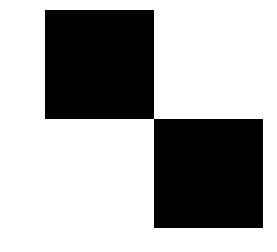

In [27]:
# not quite.  we need to tell it to use a grayscale color mapping
# note:  by default the range [0,1] is expanded to fill the [0,255] intensity scale
#        so:  0--->0 (black) and 1--->255 (white)

# also:  remove the x/y grid points (matplotlib calls these "spines") and the frame
ax = plt.gca()
ax.imshow(arr, cmap='gray')
ax.axis('off');

Since we will be using this pattern so frequently, we'll give it a name and wrap it up in a function.  Note, we set interpolation to bicubic for a default so that "real world" images look better when we display them.  We'll have to remember that so that we can "turn it off" (pass `interpolation=None` ... which really does nearest neighbor interpolation but is close to showing the data as it is).  

In [28]:
# FIXME CODE
# consider my_show --> show
#          my_gshow --> show_bw or show_gray

In [29]:
# line 5:  def my_show(**kwargs) --> takes any "extra" keyword arguments and 
#                                    puts them in a dictionary named kwargs
# line 7:  ax.imshow(**kwargs)   --> takes kwargs (a dictionary) and 
#                                    "expands" them into keyword arguments to imshow
def my_show(ax, img, title=None, interpolation='bicubic', **kwargs):
    ' helper to display an image on an axes without grid/spine '
    ax.imshow(img, interpolation = interpolation, **kwargs)
    ax.axis('off')
    if title:
        ax.set_title(title)

def my_gshow(ax, img, title=None, cmap='gray', interpolation='bicubic', **kwargs):
    ' helper to display an image, in grayscale, on an axes without grid/spine '
    my_show(ax, img, title=title, cmap='gray', interpolation=interpolation, **kwargs)

Often, we'll want to compare several images (before and after some processing step).  To do that, we'll want more than one matplotlib axis to draw on.  `subplots` gives us a convenient way to get the axes to work with.  Then, we can pass different axes on to our show functions.  A note on `figsize`:  you can look at `plt.rcParams['figure.figsize']` to see the default (and use `rcParams` as a dictionary to find other configuration options).

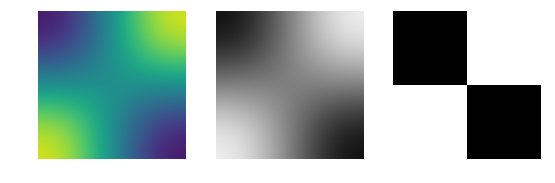

In [30]:
fig, axes = plt.subplots(1,3,figsize=(9,3))  # 1 row, 3 columns of figures

# axes is a numpy array with nrows, ncols ... unless one of the values is 1 ... then it is a 
# 1-D thing (but see squeeze=True squeeze=False argument to subplots to keep dimensions)
arr = np.array([[0,1],
                [1,0]], dtype=np.float64)
my_show(axes[0], arr)
my_gshow(axes[1], arr)
my_gshow(axes[2], arr, interpolation=None)

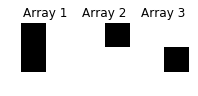

In [31]:
fig, axes = plt.subplots(1,3,figsize=(3,9))  # 1 row, 3 columns of figures
axes = axes.flat # a 1-D iterable of the axes (row-major)

# make three random tiny arrays
rnd_arrays = [npr.randint(0,2,(2,2)) for i in range(3)]

# we can use the axes.flat iterable in Python-fu
# zip(seq1, seq2) gives (seq1[0], seq2[0]), (seq1[1], seq2[1]), ...
# enumerate(seq, start) gives (start, seq[0]) (start+1,seq[1]) ...
for idx, (ax, arr) in enumerate(zip(axes, rnd_arrays), 1):
    my_gshow(ax, arr, interpolation=None, title="Array {}".format(idx))

Since you are now exposed to `Figure`s and `Axes`, let's take a second to look at them more closely.  In the following cell, we make the overall `Figure` gray and we place two axes on it.  You can control much of the styling of the components independently.

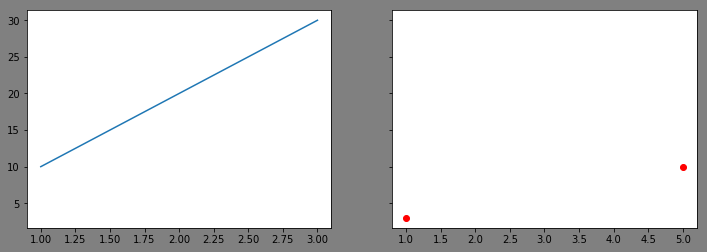

In [32]:
fig, axes = plt.subplots(1,2,facecolor='gray', figsize=(12,4), sharey=True)
axes[0].plot([1,2,3], [10,20,30])
axes[1].plot([1,5], [3,10], 'ro');
# fig.savefig('test.png', transparent=True) #

One other quick note.  So far, we've completely used the "object-oriented API" for matplotlib.  We recommend getting figures and axes from `plt.` commands and then consistently using the OO-api.  We encourage you to use this for 99+% of your matplotlib code.  However, you might see code like the following that relies heavily on implicit figures/axes and uses many `plt.` functions directly.  Warning!  The `plt.` functions and the `ax.` methods *look very similar* but are used differently.  Mixing them will result in headaches and frustration.

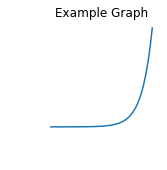

In [33]:
xs = np.linspace(0,10, 100) # 100 evenly spaced points from 0 to 10 inclusive
ys = np.exp(xs)  # y = e^x

# the following are examples of the (not recommended) MATLAB-like API
plt.figure(figsize=(2,2)) # affects the implicit figure

plt.plot(xs, ys)           # uses the implicit axis
plt.title("Example Graph") # compare with ax.set_title('Example Graph')
plt.xlabel("Time")         # compare with ax.set_xlabel('Time')
plt.axis('off');           # compare with ax.axis('off')

# First Steps with OpenCV

In [34]:
# FIXME:  content

[OpenCV](http://opencv.org/) is XXXXX.
  * [FIXME VERIFY] Python API docs are [included here](http://docs.opencv.org/3.0-last-rst/)


For example, for `cv2.imread`:
  * [Docs for OpenCV3 shows Python API](http://docs.opencv.org/3.0-last-rst/modules/imgcodecs/doc/reading_and_writing_images.html#imread)
  * [Newer Docs for OpenCV3 - Missing Python API](http://docs.opencv.org/3.3.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)
  * [Older OpenCV2 Docs](http://docs.opencv.org/2.4.13.3/modules/highgui/doc/reading_and_writing_images_and_video.html#cv2.imread)  
    * In some respects, the version 2.x docs seems more mature
    * Not up-to-date
    * There is some breakage (API differences) from 2.x -> 3.x

In [39]:
# vaguely looks like ~20 cells from the first vision notebook
!conda install cv2
#import cv2 # yes, we are using opencv version 3 :grumpyface:

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - cv2

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/osx-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/osx-64
  - https://repo.anaconda.com/pkgs/pro/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [38]:
# code to find version of opencv
cv2.__version__

NameError: name 'cv2' is not defined

In [ ]:
img_dir = '../common/'
messi_gray = cv2.imread(img_dir+'data/messi.jpg', 0)
my_gshow(plt.gca(), messi_gray) # use the default axes for quick-and-dirty

In [ ]:
# we can also use scipy to read in images:
from scipy import ndimage
img = ndimage.imread(img_dir+'data/messi.jpg') # default here is RGB
img.shape

In [ ]:
messi_color = cv2.imread(img_dir+'data/messi.jpg') # default flag is 1 "color"

print(type(messi_color), 
      messi_color.shape, 
      messi_color.dtype)

my_show(plt.gca(), messi_color)
# FAIL:  mishmash of colors

In [ ]:
# opencv is GBR; matplotlib is RGB.  
my_show(plt.gca(), messi_color[:,:,::-1]) # walk last axis in opposite order (we'll never do this again!)

In [ ]:
# better: explicitly convert the image to RGB
messi_rgb = cv2.cvtColor(messi_color, cv2.COLOR_BGR2RGB)
my_show(plt.gca(), messi_rgb)

In [ ]:
# these come up frequently.  we'll always want rgb (instead of bgr)
# and we often need both rgb and grayscale (grayscale starts many processing steps)
def my_read(filename):
    ' read from an image file to an rgb '
    img = cv2.imread(filename)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def my_read_cg(filename):
    ' read from an image file to an rgb and a grayscale image array '
    rgb = my_read(filename)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    return rgb, gray

# now we can do this:
messi_rgb = my_read(img_dir+'data/messi.jpg')

# or if we need both
messi_rgb, messi_gray = my_read_cg(img_dir+'data/messi.jpg')

# OpenCV Images as NumPy Arrays

In [ ]:
messi_rgb = my_read(img_dir+'data/messi.jpg')

Since messi_rgb is "just" a NumPy array, we can do NumPy array things:

In [ ]:
print(messi_rgb[100,100],     # access a pixel
      messi_rgb[300,:].shape) # sub-select a row; it's an array also.  take its shape

In [ ]:
# pixels are people ... err ... arrays too
pixel = messi_rgb[100,100]
print(type(pixel),
      pixel.shape,  # 1-D, scalar, array
      pixel)

In [ ]:
# massi's right wrist has a white spot!
messi_rgb[100:105,100:105]=[255,255,255] # white (note, our target pixel also had 3 spots to fill)
my_show(plt.gca(), messi_rgb)

In [ ]:
ball_soi = messi_rgb[280:340, 330:390] # "soi" = square of interest :)
messi_rgb[273:333, 100:160] = ball_soi  # copy to new area
my_show(plt.gca(), messi_rgb)

In [ ]:
# often we want to access color channels separately
# split to separate arrays per color (costly, prefer to access by indexing)
chans = r,g,b = cv2.split(messi_rgb)
restored = cv2.merge((r,g,b))

print(r.shape)

In [ ]:
fig, axes = plt.subplots(1,4,figsize=(12,3))
axes = axes.flat

# handle first as special case
first_axis = next(axes)
my_show(first_axis, messi_rgb)
first_axis.set_title("original")

# display per channel images
for ax, ch, name in zip(axes, chans, ["R", "G", "B"]):
    my_gshow(ax, g)
    ax.set_title("{} channel".format(name))

In [ ]:
# cv2.split is a convenience wrapper around numpy's split command
# aka, split on last axis into size(last axis) pieces
r_np,_,_ = np.split(messi_rgb, messi_rgb.shape[-1], -1) 
print(r_np.shape,
      np.allclose(r, r_np[:,:,0])) # only 1D in last axis, so index it out

In [ ]:
# we can often just use indexing directly (see line 9)
# also show off matplotlib histograms

color_to_index = {"R":0, "G":1, "B":2}  # map strings to appropriate index in 

fig, axes = plt.subplots(1,3,figsize=(12,3), sharey=True)
for ax, color in zip(axes, color_to_index):
    c = color_to_index[color]
    this_channel = messi_rgb[:,:,c].ravel() # 1D view without copying 
    
    ax.hist(this_channel, 256, normed=True)
    ax.set_title("Histogram for {}".format(color))

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(6,6))
axes = axes.flat

messi = my_read(img_dir+'data/messi.jpg')
my_show(next(axes), messi, title="Size:{}".format(messi.shape[:2]))

borders = [cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_CONSTANT]
for ax, border in zip(axes, borders):
    with_border = cv2.copyMakeBorder(messi, 50,50,50,50,border)
    my_show(ax, with_border, title="Size:{}".format(with_border.shape[:2]))

# Exercises

In [ ]:
# gathering the setup code.  
# if you are doing the exercises in another notebook, make sure these are executed
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

def show_array(arr):
    print(arr)
    for attr in ["size", "shape", "dtype"]:
        print("{:>5s} {}".format(attr, getattr(arr, attr)))  # getattr(obj, "attr") --> obj.attr

## NumPy

  1.  Read the documentation for `np.zeros`.
    1.  The generic way:  google "numpy zeros"
    2.  The python way:  `import numpy as np`, `help(np.zeros)`
    3.  The jupyter way:  `import numpy as np`, `?np.zeros`
    4.  The master way:   `import numpy as np`, `np.zeros( <after open-paren hit tab two or four times>`
    
  2.  We'll be interested in only a few `dtypes` in this class:  `np.float64`, `np.uint8`, `np.int64` [but there are more out there](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html).  Create a NumPy array using `np.zeros` that has:
    1.  5 total elements in one dimension, floats
    2.  12 total elements in two dimensions, small unsigned ints
    3.  12 total elements in three dimensions, bigger signed ints
    4.  display each of these using the `show_array` function from above
  4.  `np.tile` is wonderfully useful to create "grided" patterns.  Let's explore it.
    1.  Create a simple 2x2 array called `myarr`.
    2.  Try the following versions of tile (execute the commands *and* check out the shape of the result):
      1. `np.tile(myarr, 1)`
      1. `np.tile(myarr, 2)`
      1. `np.tile(myarr, (1,1))`, 
      1. `np.tile(myarr, (2,1))`
      1. `np.tile(myarr, (1,2))`, 
      1. `np.tile(myarr, (2,2))`
      1.  Now, try to predict what `crazy_tile = np.tile(myarr, (3,1,1))` will do.  Now do it yourself.
    3.  With that final "tiled" array, trying to:
      1.  Generate the sums over visual "rows", "columns", and what I like to "panels" (the outermost grouping of row-column 2-D looking things).  Be careful to remember that `axis=0` means "outermost dimension".   Visually, this means "summing by looping over the panels of `crazy_tile`".
      2.  Take these sums (one at a time, not all together) and append them on to `crazy_tile` using `np.concatenate`.


In [ ]:
# numpy 1:  
# just follow along

# numpy 2:
arrays = [np.zeros(5, np.float64), 
          np.zeros((3,4), np.uint8),
          np.zeros((2,2,3), np.int64)]
for arr in arrays:
    show_array(arr)
    
# numpy 3
myarr = np.array([[1,2], [3,4]])
for args in (1,2,(1,1),(2,1),(1,2),(2,2)):
    show_array(np.tile(myarr, args))

# numpy 3
crazy_tile = np.tile(myarr, (3,1,1))
crazy_tile.sum(axis=1) # visual rows
crazy_tile.sum(axis=2) # visual cols   (innermost)
crazy_tile.sum(axis=0) # visual panels (outermost)

# numpy 3
for axis in [0,1,2]:
    ax_sum = crazy_tile.sum(axis=axis, keepdims=True)
    show_array(np.concatenate([crazy_tile, ax_sum], axis=axis))

## Matplotlib Exercises

  1. Use `np.zeros` and `np.ones` to create a square NumPy array that represents an image with a black square centered inside an outer white square.  Let the sides of the inner black square be 1/2 the length of the sides of the outer white square. Display your result (remember to set `interpolation=None`).
  2. Add noise to the square you just made and display the result.  One way to do that is (1) create a white-noise image and (2) select either the "real" image point or the "white noise" image point.
  
    You'll end up generating two random things:  the white-noise image and a selector.  To *use* the selector, break out `np.where(condition, take_if_true, take_if_false)`.  In a basic case, all three arguments have the same shape.  At a position in the result (which has the same shape as the inputs), if `condition` holds (it is true), result gets a value from the second argument.  Otherwise, a value from the third argument goes into the result.  Read the docs for `np.where` and try simple example or two to get a feel for how it works.  Building small, demonstrative examples is a monumentally important skill!
  3.  To preview some important ideas that we will get to in week 3, let's spend a few minutes interpreting an image as a function with a numerical derivative.  Specifically, we'll take a slice of values (across a row or column) and look at the differences between values from one pixel to the next.  `np.diff` is tailor-made to do this.  With your centered square from the first matplotlib exercise, take the `np.diff` across the center row and center column.  Graph the row and its 1st-difference with `plt.plot`.  *GOTCHA WARNING: `np.diff` has two gotchas.  (1)  calling it on `arr` will result in an array with `dtype==arr.dtype`.  The square you made is (possibly) a `np.uint8` array.  But, you can fix it!  (2)  `np.diff` results in an array smaller than the input because there is no difference for the first element.  There are a few ways around that.  Pick one.*
  3.  NumPy and Matplotlib Graduation Day.  Use `np.zeros`, `np.ones`, `np.tile`, and `imshow` to create and display a black-and-white chessboard.  Chessboards are an 8x8 grid of squares.

In [ ]:
# matplotlib exercise 1,2
fig,axes = plt.subplots(1,2,figsize=(12,4))
axes = axes.flat

shape = (300,300)

orig = np.zeros(shape, dtype=np.uint8)
orig[75:225, 75:225] = 255
my_gshow(next(axes), orig, interpolation=None)

# not ultra efficient
blur = np.random.randint(0,256,size=shape).astype(np.uint8)
blurred = np.where(np.random.uniform(size=shape) > .3, orig, blur)
my_gshow(next(axes), blurred, interpolation=None)

In [ ]:
# exercise 3, warm up
test = np.array([1,3,5,10])
print(np.diff(test), 
      test[:-1] + np.diff(test)) # to recreate original (except first point)

In [ ]:
# exercise 3
row_slice = orig[150,:]
print(row_slice.min(), row_slice.max())

row_diff = np.diff(row_slice.astype(np.int16)) # otherwise diff loses sign
print(row_diff.min(), row_diff.max())

plt.plot(np.arange(299), row_slice[:-1], 'r') # could also use row_slice[1:] to align "at" jump
plt.plot(np.arange(299), row_diff, 'b');      # no diff for first elt

In [ ]:
# exercise 4

# strategy:  create the top-left corner and then duplicate it with tile
# base squares
base_len = 100
black = np.zeros((base_len, base_len), dtype=np.uint8)
white = np.full_like(black, 255)

# top-left corner
# .c_ / .r_ create by specifying columns / rows using [] notation
# can also use concatenate along axis=1 for np.c_ and axis=0 for np.r_
top_left = np.c_[np.r_[white,black], np.r_[black,white]]

# tiled out
board = np.tile(top_left, (4,4))
my_gshow(plt.gca(), board, interpolation=None)

## Exercises with OpenCV and NumPy Together

Now, let's get a first look at the OpenCV documentation and practice making an OpenCV call.  We'll do much more of this next week!  Find the online documentation for `copyMakeBorder` and read it.  Yes, it might be painful - but, you'll need to develop this skill - reading online documentation - to master all that OpenCV (and other open-source software) has to offer.  

Experiment with different arguments to `copyMakeBorder` and compare histograms of the image before and after.  You might want to "turn off" `sharey` and `normed` from the code above to see the effect they have.

Above, we made three histograms in one row of a `subplots` set of axes.  Can you place the original and modified histograms over-under each other in two rows of a `subplots`?

Lastly, copy a region-of-interest from one part of the image to another, using NumPy array operations.  You'll need to deal with the fact that an assignment within NumPy arrays must be from a source and a destination with the same size (this isn't strictly true, but we'll use it as a simplification for this exercsise -- if you want to know more, look up broadcasting).

In [ ]:
# Docs at:
# https://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html#copymakeborder
# make sure you find the opencv 3 docs

outdoors = my_read(img_dir+'data/farm-drop.jpg')
with_border = cv2.copyMakeBorder(outdoors, 20,20,20,20,cv2.BORDER_CONSTANT)
my_show(plt.gca(), with_border)

In [ ]:
color_to_index = {"R":0, "G":1, "B":2}

fig, axes = plt.subplots(2,3,figsize=(12,3), sharey=True)
for column, color in enumerate(color_to_index):
    for row, img in enumerate([outdoors, with_border]): 
        c = color_to_index[color]
        this_channel = img[:,:,c].ravel()

        axes[row, column].hist(this_channel, 256, normed=True)
        axes[0,column].set_title("Histogram for {}".format(color))

In [ ]:
# next lesson, we'll learn about drawing, this is another option to track down
# your region of interest
marked_up = cv2.rectangle(outdoors, (1000,80), (1500, 800), (255,255,255), 10)
my_show(plt.gca(), marked_up)

In [ ]:
# duplicate the ROI in another part of the image
roi = marked_up[81:800, 1001:1500]
shape = roi.shape
marked_up[10:10+shape[0],10:10+shape[1]] = roi
my_show(plt.gca(), marked_up)